In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline
#plt.show()없이 화면에 보여줘

pd.options.mode.chained_assignment = None

In [2]:
# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode('utf8'))

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#데이터 불러오기

In [4]:
order_products_train_df = pd.read_csv('/content/drive/MyDrive/ESAA_DATA/order_products__train.csv')
order_products_prior_df = pd.read_csv("/content/drive/MyDrive/ESAA_DATA/order_products__prior.csv")
orders_df = pd.read_csv("/content/drive/MyDrive/ESAA_DATA/orders.csv")
products_df = pd.read_csv("/content/drive/MyDrive/ESAA_DATA/products.csv")
aisles_df = pd.read_csv("/content/drive/MyDrive/ESAA_DATA/aisles.csv")
departments_df = pd.read_csv("/content/drive/MyDrive/ESAA_DATA/departments.csv")

#데이터 확인하기

In [5]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


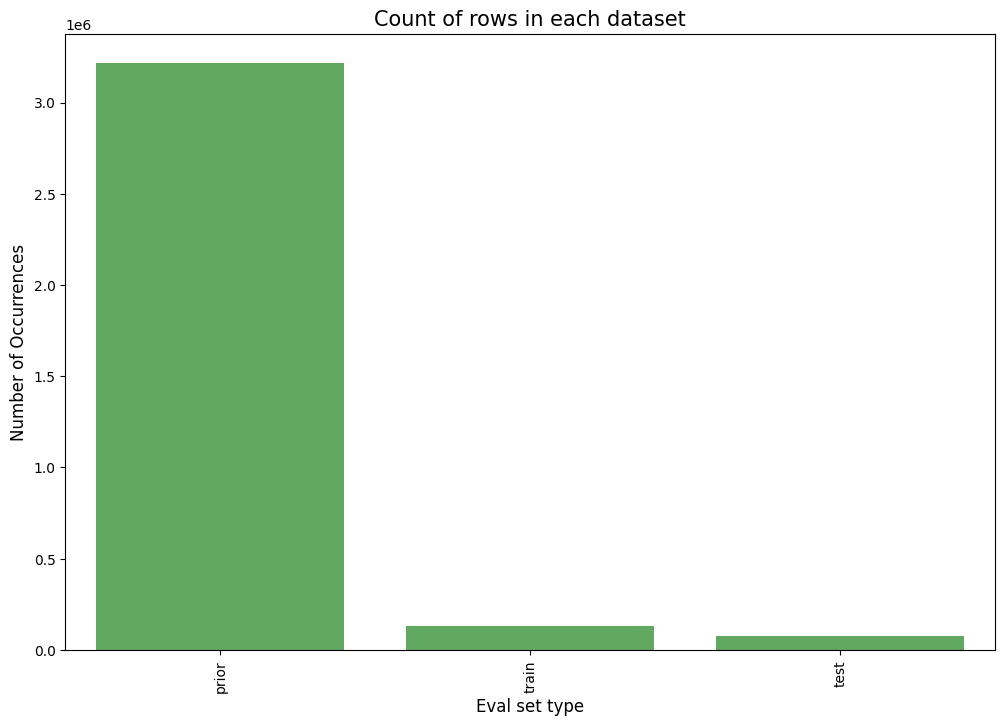

In [7]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[2]) #녹색으로 맞춰주기 위해 1 >2
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [8]:
def get_unique_count(x):
  return len(np.unique(x))
cnt_srs = orders_df.groupby('eval_set')['user_id'].aggregate(get_unique_count)
cnt_srs

,user_id
eval_set,
prior,206209
test,75000
train,131209


<ipython-input-9-ea2c7bdfe7c1>:1: FutureWarning: The provided callable <function max at 0x7d39fabc4900> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cnt_srs = orders_df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()


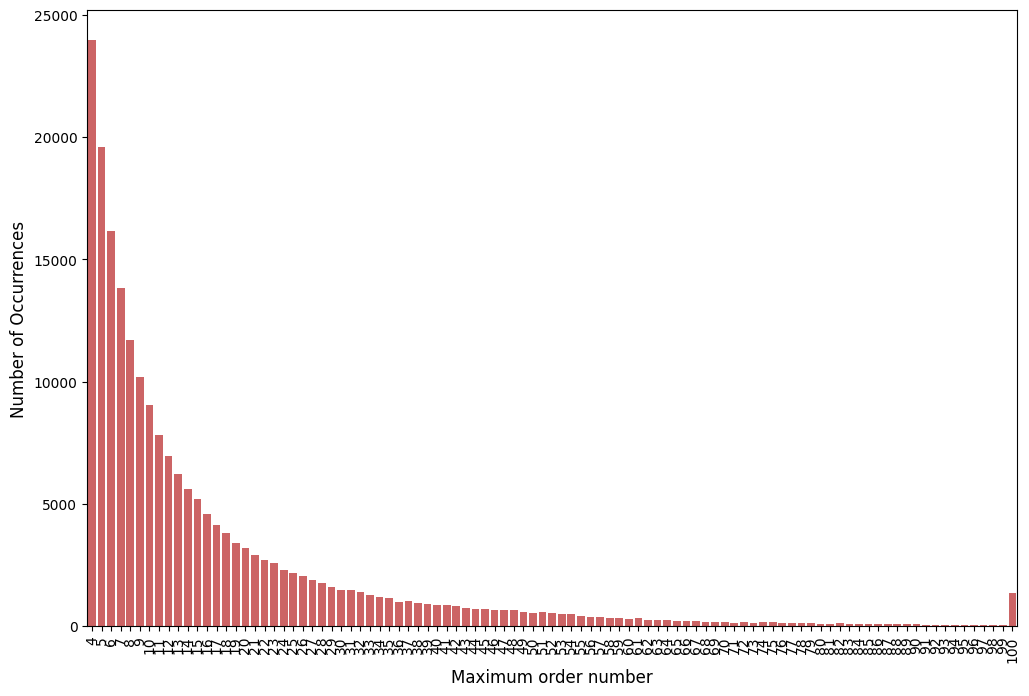

In [9]:
cnt_srs = orders_df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index,y=cnt_srs.values, alpha=0.8, color=color[3])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

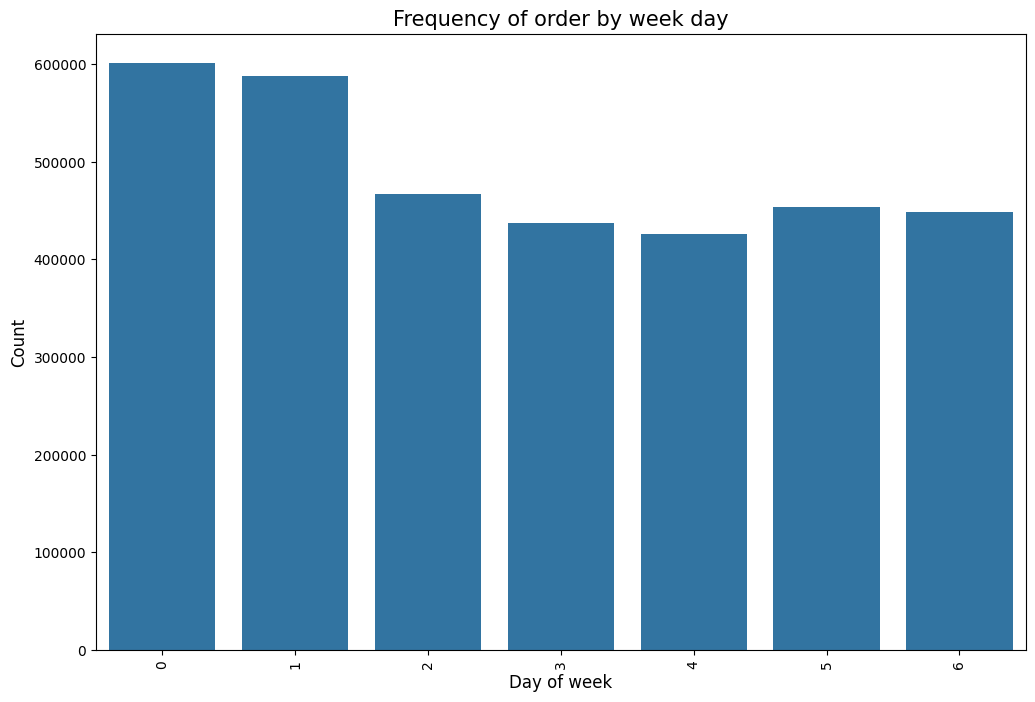

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x='order_dow', data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of order by week day', fontsize=15)
plt.show()

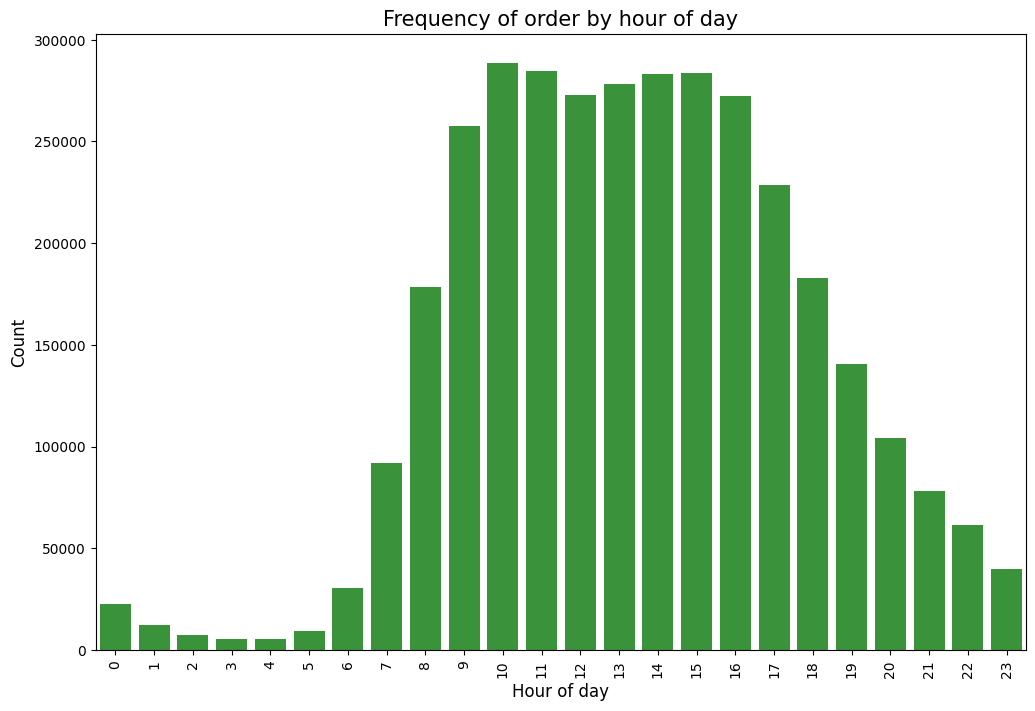

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x='order_hour_of_day', data=orders_df, color=color[2])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

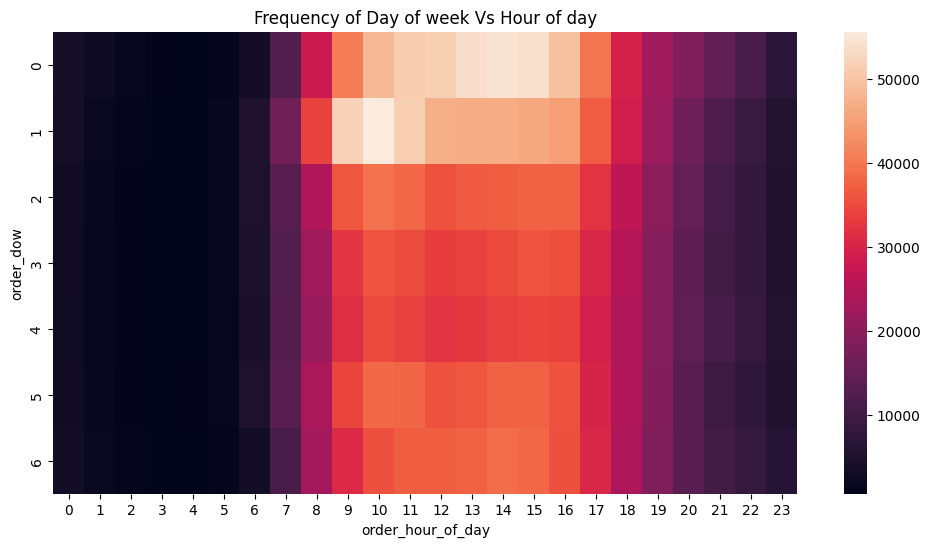

In [12]:
grouped_df = orders_df.groupby(['order_dow','order_hour_of_day'])['order_number'].aggregate('count').reset_index()
grouped_df = grouped_df.pivot(index='order_dow', columns = 'order_hour_of_day', values='order_number')
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title('Frequency of Day of week Vs Hour of day')
plt.show()

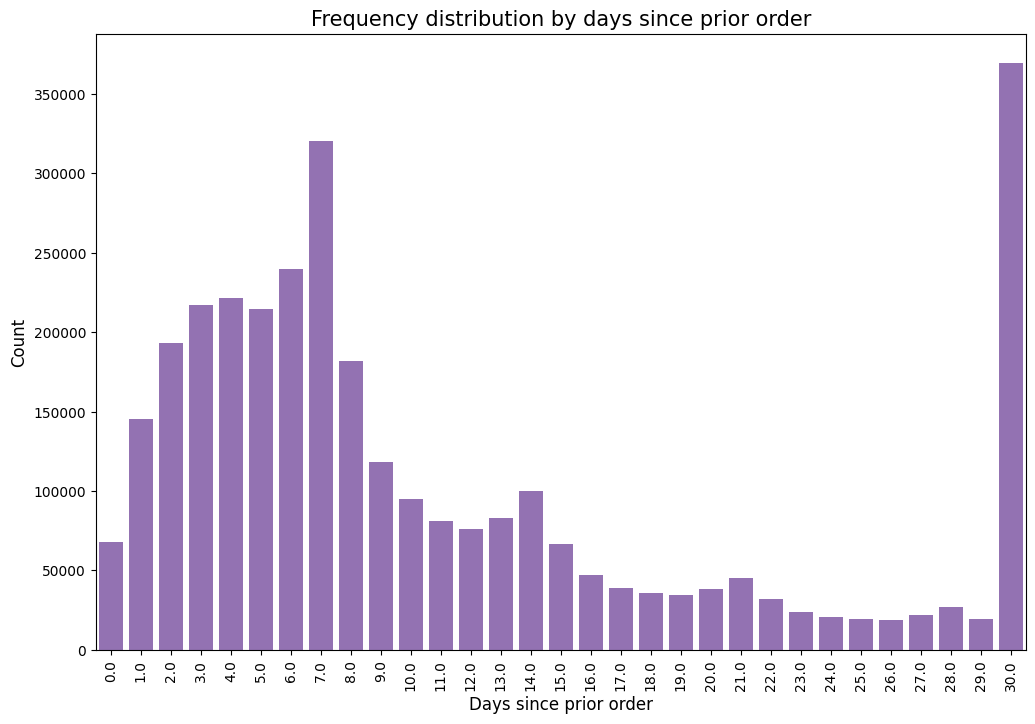

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x='days_since_prior_order', data=orders_df, color=color[4])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

In [14]:
#percentage of re-orders in prior set #
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

np.float64(0.5896974667922161)

In [15]:
# percentage of re-orders in train set #
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

np.float64(0.5985944127509629)

In [16]:
grouped_df = order_products_prior_df.groupby('order_id')['reordered'].aggregate('sum').reset_index()
grouped_df['reordered'].loc[grouped_df['reordered']>1] = 1
grouped_df['reordered'].value_counts() / grouped_df.shape[0]

<ipython-input-16-08eeec6421af>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  grouped_df['reordered'].loc[grouped_df['reordered']>1] = 1


,count
reordered,
1,0.879151
0,0.120849


In [17]:
grouped_df = order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

<ipython-input-17-80c704cc6039>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1


,count
reordered,
1,0.93444
0,0.06556


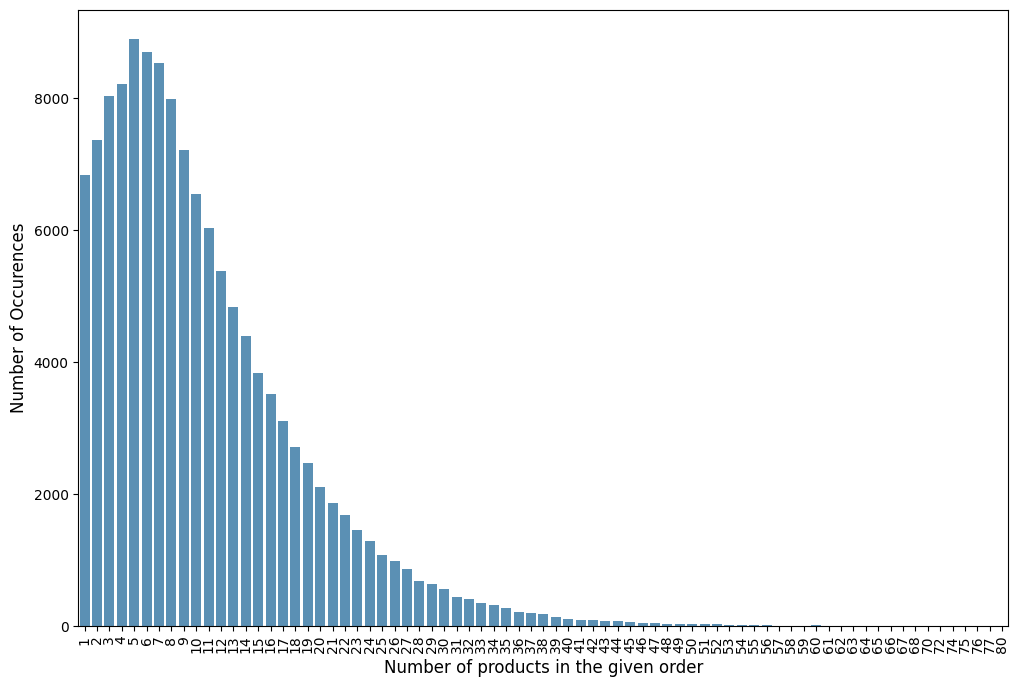

In [18]:
grouped_df = order_products_train_df.groupby('order_id')['add_to_cart_order'].aggregate('max').reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [19]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [20]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [21]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [22]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on = 'product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on = 'aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [23]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


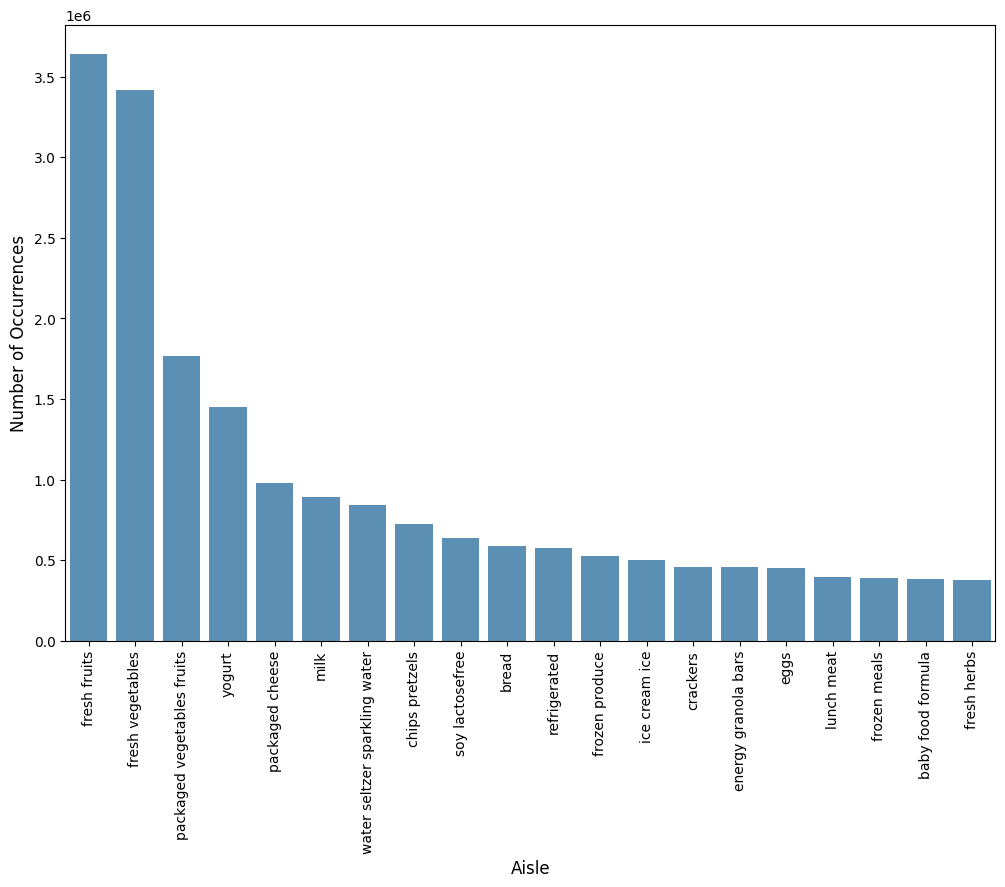

In [24]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation = 'vertical')
plt.show()

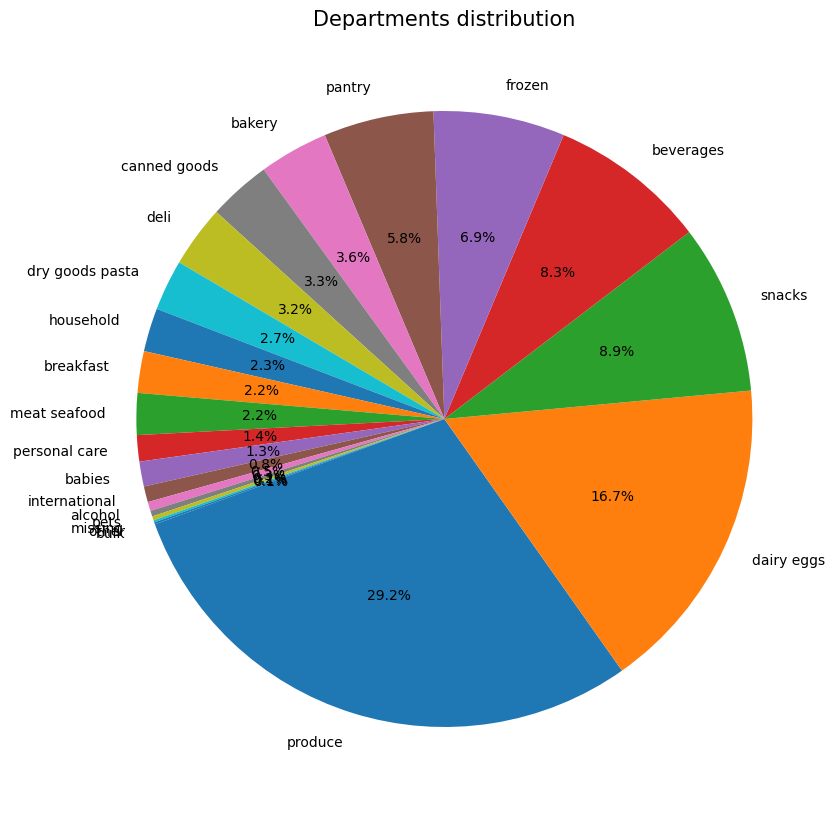

In [25]:
plt.figure(figsize=(10,10))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series/temp_series.sum())*100))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
plt.title('Departments distribution', fontsize=15)
plt.show()

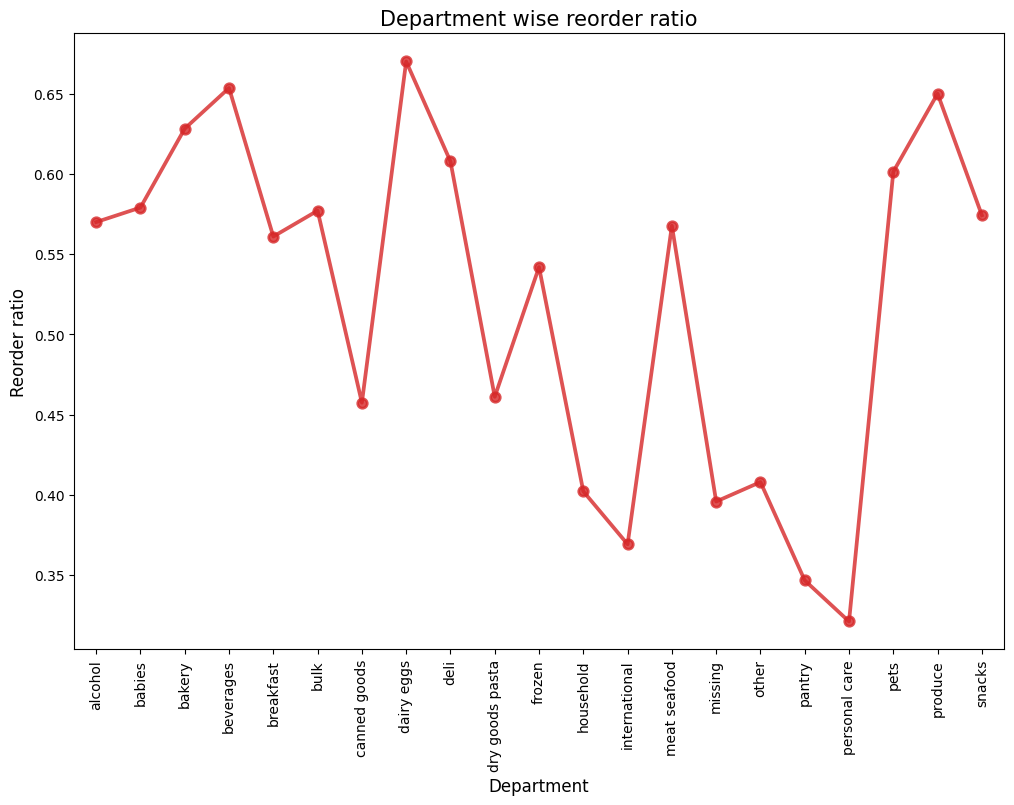

In [26]:
grouped_df = order_products_prior_df.groupby(['department'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['department'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title('Department wise reorder ratio', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

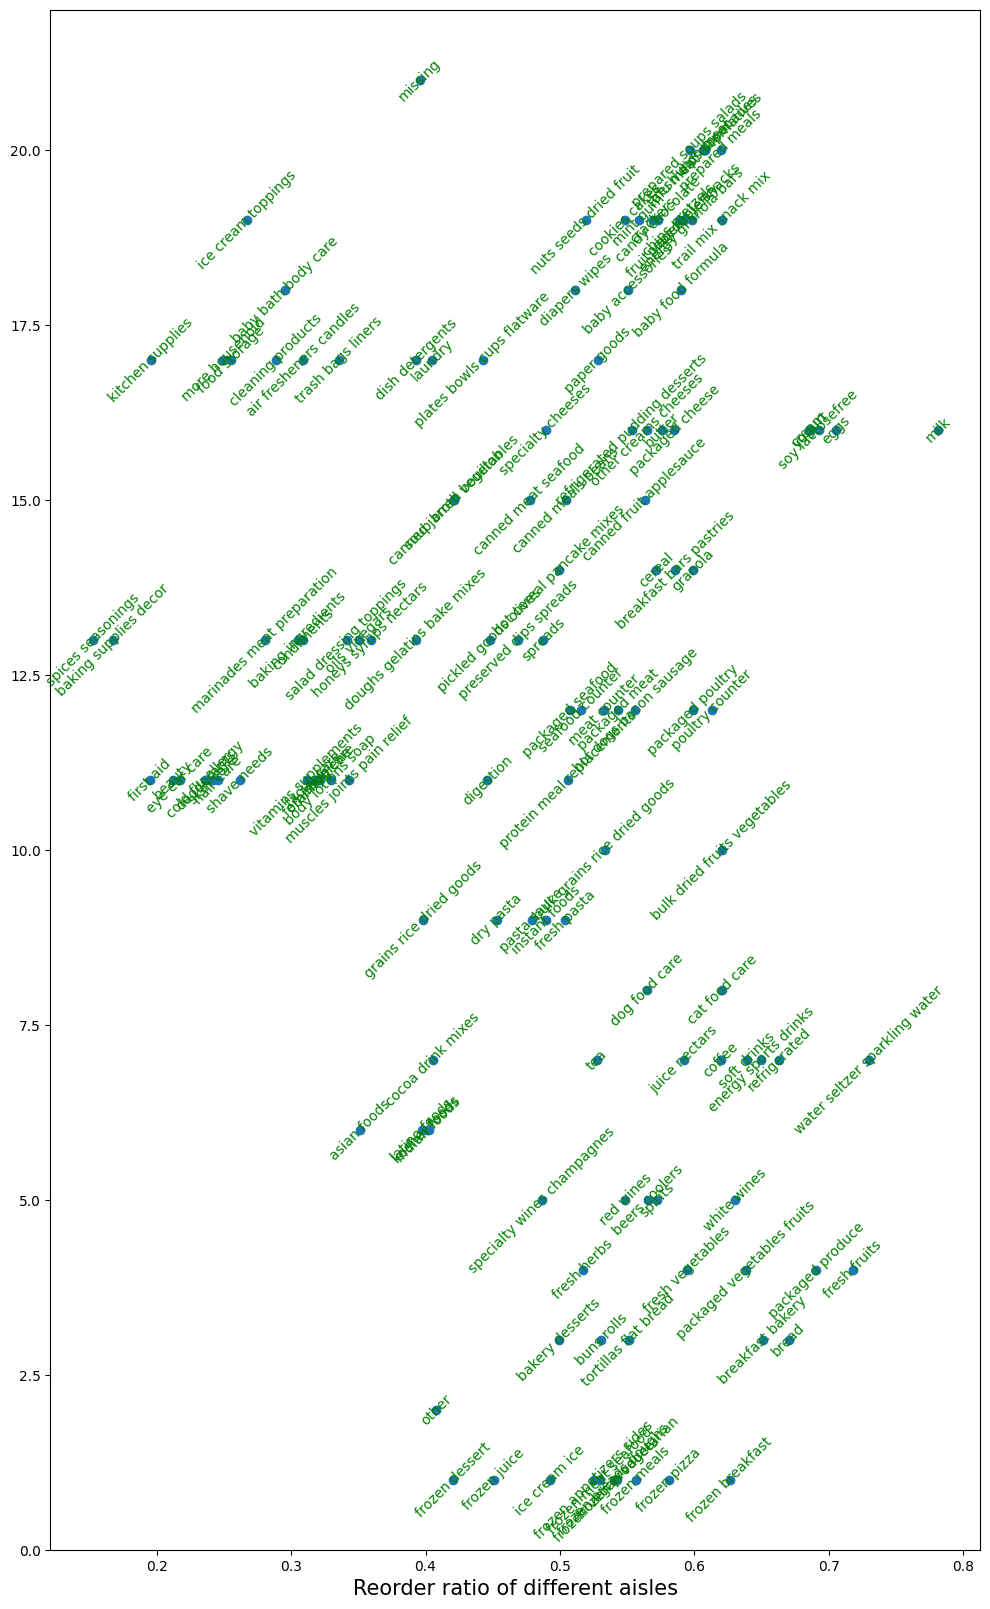

In [27]:
grouped_df = order_products_prior_df.groupby(['department_id', 'aisle'])['reordered'].aggregate('mean').reset_index()

fig, ax = plt.subplots(figsize=(12,20))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i,txt in enumerate(grouped_df.aisle.values):
  ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation=45, ha='center', va='center',color='green')
plt.xlabel('Reorder ratio of different aisles', fontsize=15)
plt.show()


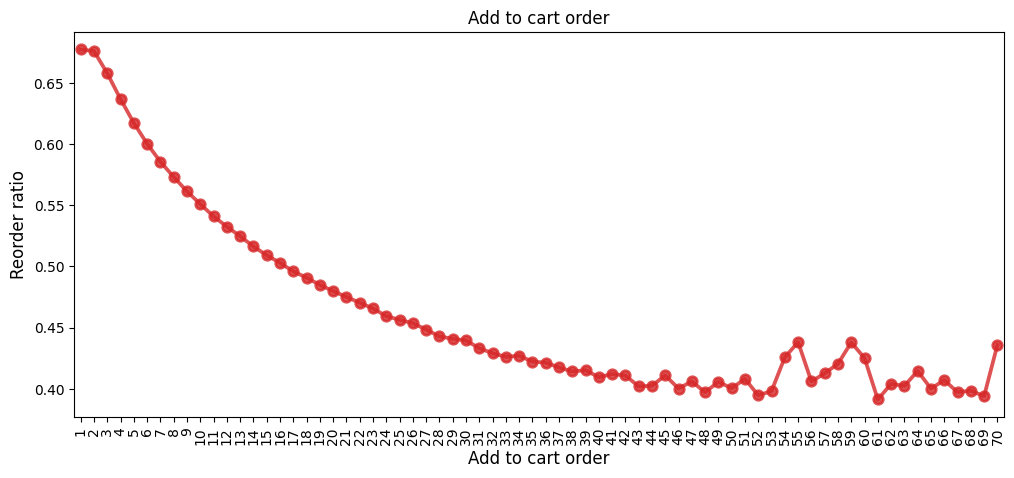

In [28]:
order_products_prior_df['add_to_cart_order_mod'] = order_products_prior_df['add_to_cart_order'].copy()
order_products_prior_df['add_to_cart_order_mod'].loc[order_products_prior_df['add_to_cart_order_mod']>70] = 70
grouped_df = order_products_prior_df.groupby(['add_to_cart_order_mod'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,5))
sns.pointplot(x=grouped_df['add_to_cart_order_mod'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title('Add to cart order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

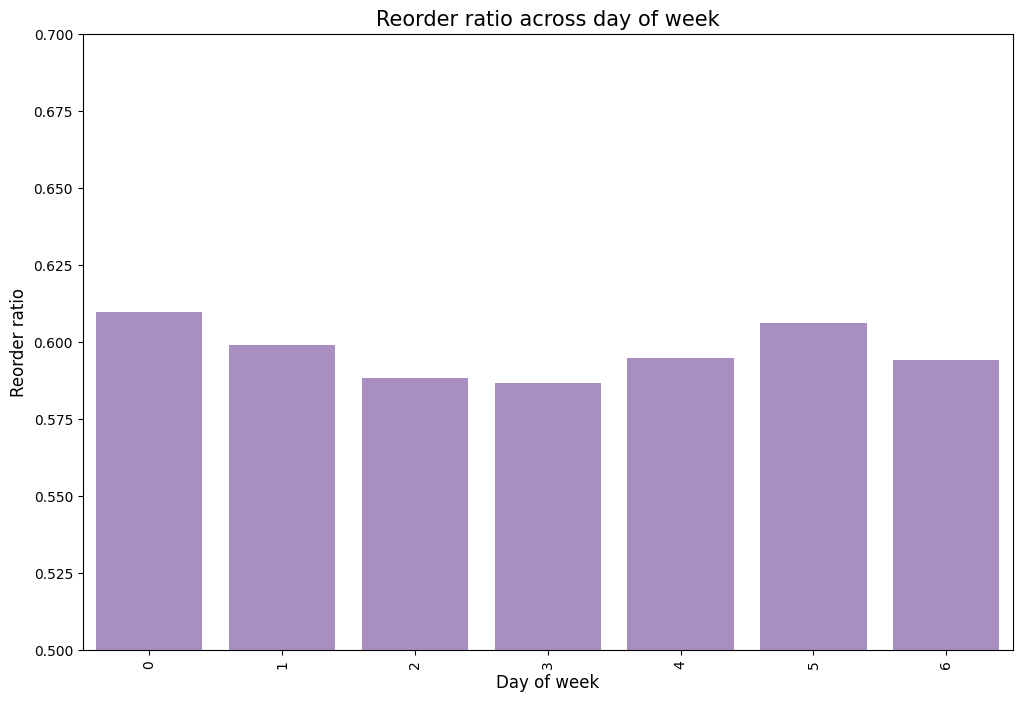

In [29]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(['order_dow'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=grouped_df['order_dow'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title('Reorder ratio across day of week', fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5,0.7)
plt.show()

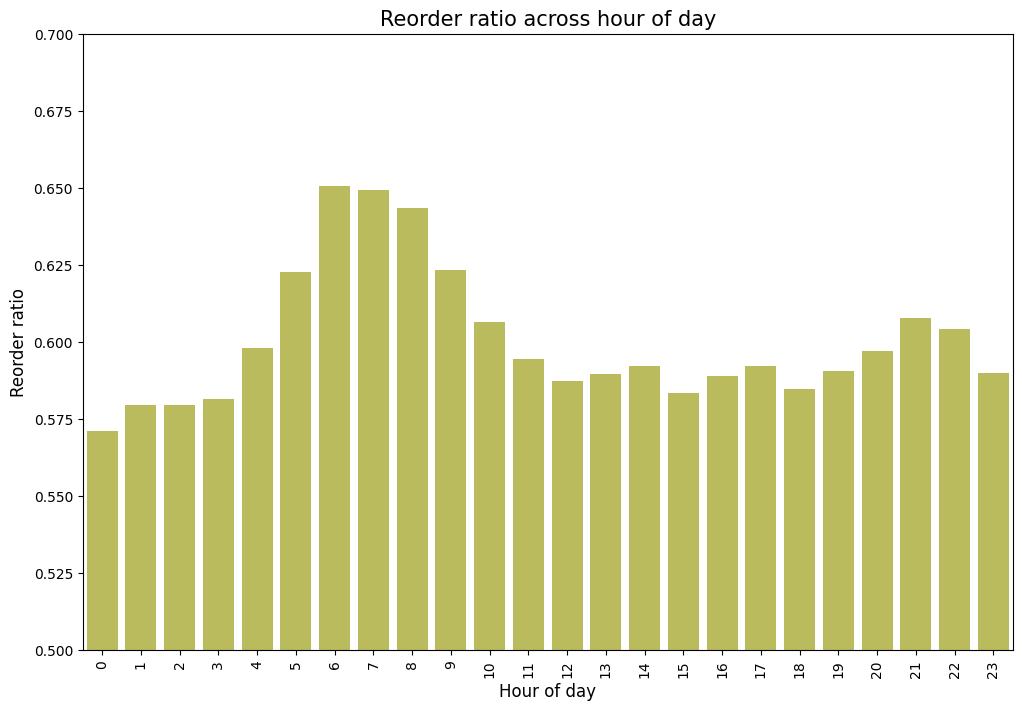

In [30]:
grouped_df = order_products_train_df.groupby(['order_hour_of_day'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=grouped_df['order_hour_of_day'].values,y= grouped_df['reordered'].values, alpha=0.8, color=color[8])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title('Reorder ratio across hour of day', fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5,0.7)
plt.show()

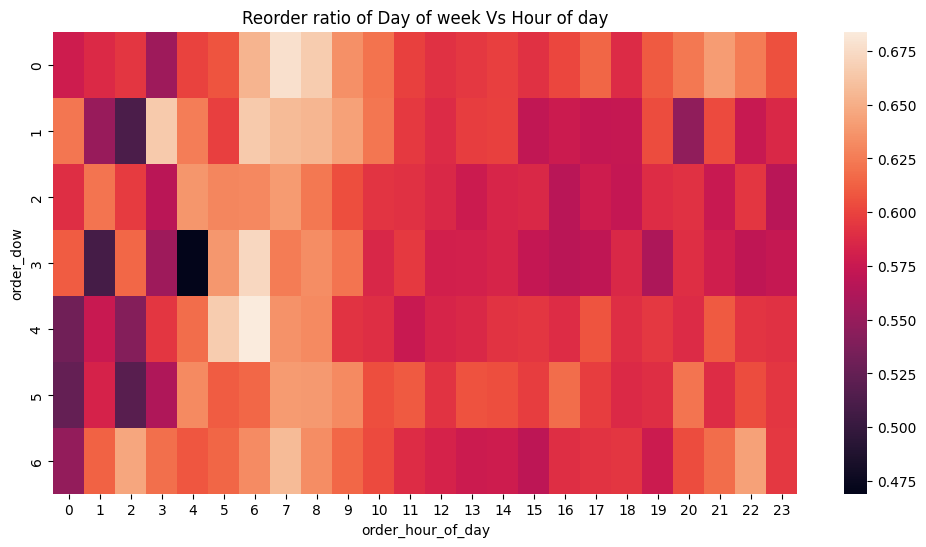

In [31]:
grouped_df = order_products_train_df.groupby(['order_dow', 'order_hour_of_day'])['reordered'].aggregate('mean').reset_index()
grouped_df = grouped_df.pivot(index='order_dow', columns='order_hour_of_day', values='reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title('Reorder ratio of Day of week Vs Hour of day')
plt.show()

#나의 시각화

In [32]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


# 마지막 주문 이후 몇주가 지났느냐와 재주문과는 연관이 있을 것이다.

In [33]:
orders_df['days_since_prior_order'].value_counts()
orders_df['week_since_prior_order'] = orders_df['days_since_prior_order'].apply(
    lambda x: 4 if x>=28 else
    3 if x>=21 else
    2 if x>=14 else
    1 if x>=7 else
    0 )

In [34]:
orders_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,week_since_prior_order
0,2539329,1,prior,1,2,8,NaN,0
1,2398795,1,prior,2,3,7,15.0,2
2,473747,1,prior,3,3,12,21.0,3
3,2254736,1,prior,4,4,7,29.0,4
4,431534,1,prior,5,4,15,28.0,4
...,...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0,4
3421079,1854736,206209,prior,11,4,10,30.0,4
3421080,626363,206209,prior,12,1,12,18.0,2
3421081,2977660,206209,prior,13,1,12,7.0,1


In [35]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,add_to_cart_order_mod
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,1
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,2
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,3
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,4
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,5


In [36]:
orders_df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order',
       'week_since_prior_order'],
      dtype='object')

In [37]:
order_products_prior_df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'department',
       'add_to_cart_order_mod'],
      dtype='object')

In [38]:
df1=orders_df.iloc[:,[0,7]]
df2=order_products_prior_df.iloc[:,[0,3]]
df = pd.merge(df1, df2, on='order_id', how='inner')

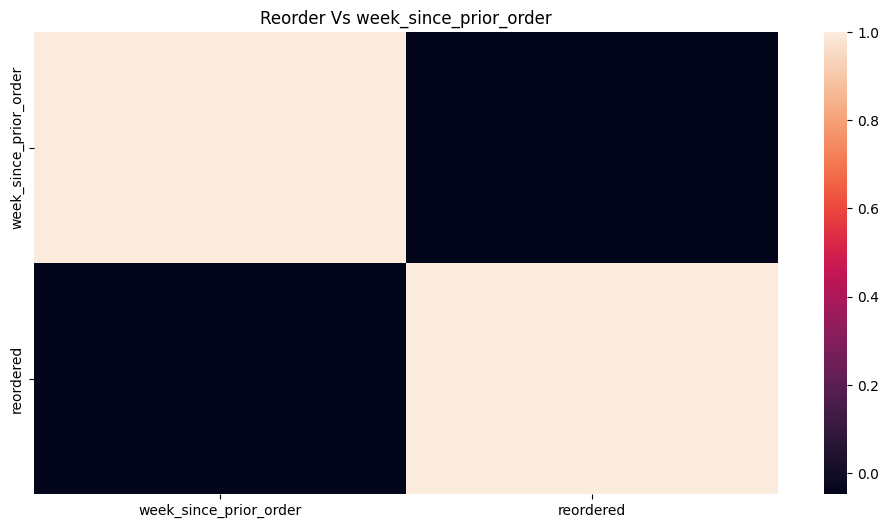

In [39]:
grouped_df=df[['week_since_prior_order','reordered']].corr()
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder Vs week_since_prior_order")
plt.show()

##아무런 연관이 없다......

# order number 수가 많은 top 10 고객이 사는 제품은 서로 연관이 있는 제품들일 것이다.


In [44]:
orders_df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order',
       'week_since_prior_order'],
      dtype='object')

<Axes: xlabel='order_number', ylabel='count'>

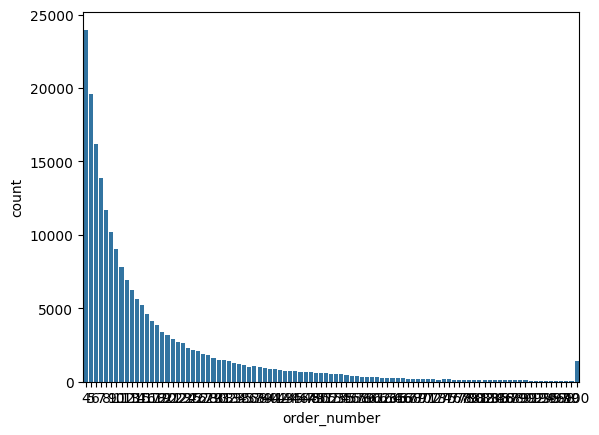

In [45]:
order_number = orders_df.groupby('user_id')['order_number'].aggregate('max').reset_index()
sns.countplot(x='order_number',data = order_number)

In [46]:
order_number[order_number['order_number']==100]['order_number'].shape[0]

1374

In [47]:
customer_list=order_number[order_number['order_number']==100]['user_id']

In [64]:
order_products_prior_df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'department',
       'add_to_cart_order_mod'],
      dtype='object')

In [65]:
df3 = orders_df[orders_df['user_id'].isin(customer_list)].iloc[:,[0,1]]
df4=order_products_prior_df.iloc[:,[0,7]]
df_2 = pd.merge(df3, df4, on='order_id', how='inner')

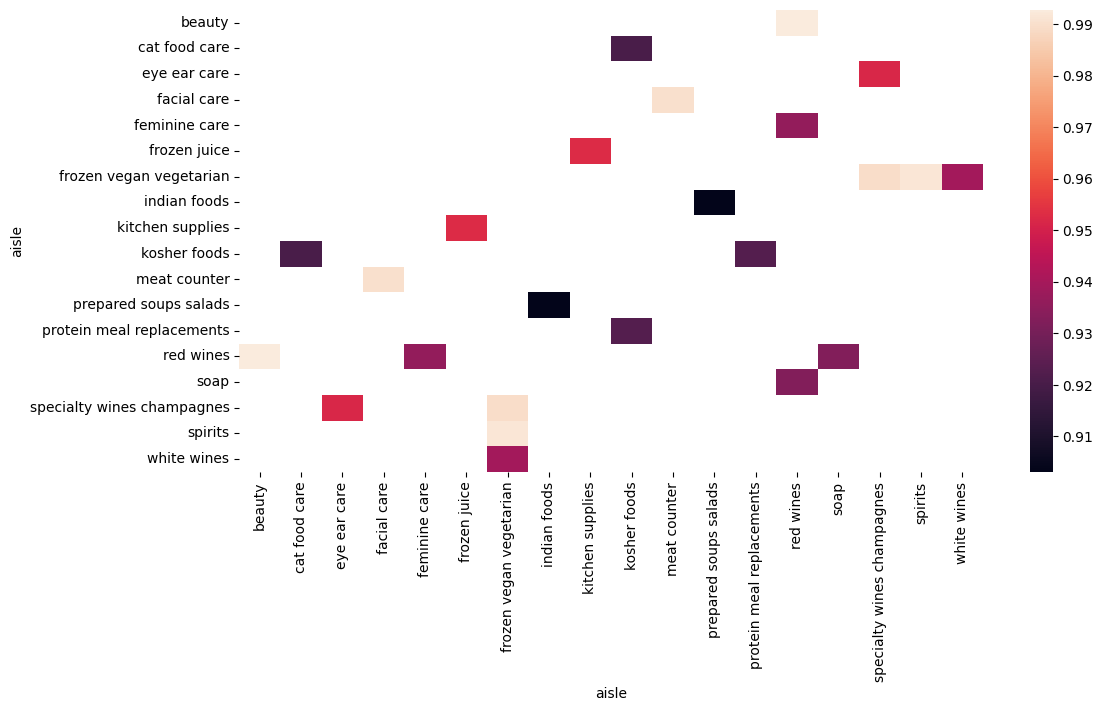

In [91]:
df_aisle_counts = df_2.groupby(['user_id', 'aisle'])['aisle'].count().reset_index(name='purchase_count')
df_aisle_pivot = df_aisle_counts.pivot_table(index='user_id', columns='aisle', values='purchase_count')
correlation_matrix = df_aisle_pivot.corr()
filtered_corr_matrix = correlation_matrix[(correlation_matrix >= 0.9) & (correlation_matrix !=1)].dropna(axis=0, how='all').dropna(axis=1, how='all')
plt.figure(figsize=(12,6))
sns.heatmap(filtered_corr_matrix)
plt.show()




#주로, 관리 제품을 많이 사는 고객층들은 와인을 같이 사는 경향이 있다.